üåæ**Proyecto de An√°lisis: Impacto del Cambio Clim√°tico en la Agricultura.**

üéØ Objetivo del Proyecto

El objetivo de este proyecto es analizar el impacto de diversas variables relacionadas con el cambio clim√°tico y las estrategias de adaptaci√≥n en la producci√≥n agr√≠cola y el impacto econ√≥mico. Usaremos t√©cnicas de inferencia estad√≠stica (estimaci√≥n y contraste de hip√≥tesis) para extraer insights accionables y responder a preguntas clave sobre c√≥mo estos factores influyen en el rendimiento de los cultivos y la econom√≠a agr√≠cola.

üìö Metodolog√≠a

El proyecto se dividir√° en las siguientes fases:

Preparaci√≥n y Exploraci√≥n de Datos (Python): Carga, limpieza y an√°lisis exploratorio inicial del dataset.

Inferencia Estad√≠stica:

Estimaci√≥n: Calcularemos intervalos de confianza para estimar par√°metros poblacionales.

Contraste de Hip√≥tesis: Realizaremos pruebas de hip√≥tesis para validar afirmaciones sobre los datos.

Conclusiones y Recomendaciones: Resumiremos los hallazgos clave y propondremos recomendaciones basadas en el an√°lisis.

**Problema principal** ¬øC√≥mo influyen factores como el aumento de temperatura y las emisiones de CO2 en el rendimiento de los cultivos (medido en toneladas m√©tricas por hect√°rea)? ¬øHa empeorado el rendimiento con el tiempo debido al cambio clim√°tico? ¬øPodemos predecir rendimientos futuros para recomendar estrategias de adaptaci√≥n?

Es de resaltar, que el dataset es extraido de https://www.kaggle.com/datasets/waqi786/climate-change-impact-on-agriculture/data

Este conjunto de datos es completamente simulado y no debe utilizarse para tomar decisiones pol√≠ticas clim√°ticas reales ni para realizar pron√≥sticos agr√≠colas. Est√° destinado a fines educativos, de investigaci√≥n y de ciencia de datos.

El significado de las columnas es la siguiente:

Year: A√±o de la observaci√≥n.

Country: Pa√≠s donde se registraron los datos.

Region: Regi√≥n espec√≠fica dentro del pa√≠s.

Crop_Type: Tipo de cultivo analizado.

Average_Temperature_C: Temperatura media en grados Celsius.

Total_Precipitation_mm: Precipitaci√≥n total en mil√≠metros.

CO2_Emissions_MT: Emisiones de CO2 en toneladas m√©tricas.

Crop_Yield_MT_per_HA: Rendimiento del cultivo en toneladas m√©tricas por hect√°rea.

Extreme_Weather_Events: Recuento de fen√≥menos meteorol√≥gicos extremos.

Irrigation_Access_%: Porcentaje de acceso al riego.

Pesticide_Use_KG_per_HA: Pesticida usado en kilogramos por hect√°rea.

Fertilizer_Use_KG_per_HA: Uso de fertilizantes en kilogramos por hect√°rea.

Soil_Health_Index: √çndice de salud del suelo.

Adaptation_Strategies: Estrategias de adaptaci√≥n utilizadas.

Economic_Impact_Million_USD: Impacto econ√≥mico en millones de d√≥lares.

**Importaci√≥n de bibliotecas necesarias**

In [1]:
# Importar bibliotecas

import pandas as pd   # para manipulaci√≥n de datos de DataFrames
import numpy as np   # para operaciones n√∫mericas y arrays
import matplotlib.pyplot as plt  # para visualizaciones
import seaborn as sns  # para visualizaciones m√°s atractivas
from scipy import stats   # para inferencia estad√≠stica (t-est, intervalos de confianza)
import statsmodels.api as sm   # para modelos de regresi√≥n

**Cargar datos**

In [2]:
# Cargar los datos desde el archivo CSV.
from google.colab import files
uploaded = files.upload()

Saving climate_change_impact_on_agriculture_2024.csv to climate_change_impact_on_agriculture_2024.csv


**Leer los datos cargados**

In [3]:
# Usar pd.read_csv() para leer el archivo. El archivo contiene datos de partidos de La Liga,
# como fecha, equipos, goles, tiros, etc.
df = pd.read_csv('climate_change_impact_on_agriculture_2024.csv')   # carga el CSV en un DataFrame de pandas.
print("Datos cargados exitosamente. Forma del DataFrame:", df.shape)   # muestra el n√∫mero de filas y columnas.

Datos cargados exitosamente. Forma del DataFrame: (10000, 15)


## **Exploraci√≥n inicial de datos (IDA)**

In [4]:
print("\nColumnas:", df.columns)   # lista las columnas
print("\nTipos de datos:\n", df.dtypes)   # muestra tipos de datos por columna
print("\nResumen estad√≠sticos:\n", df.describe())   # estad√≠sticos b√°sicos (media, desviaci√≥n est√°ndar, min, max)
print("\nValores nulos:\n", df.isnull().sum())   # verifica valores faltantes


Columnas: Index(['Year', 'Country', 'Region', 'Crop_Type', 'Average_Temperature_C',
       'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
       'Extreme_Weather_Events', 'Irrigation_Access_%',
       'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
       'Soil_Health_Index', 'Adaptation_Strategies',
       'Economic_Impact_Million_USD'],
      dtype='object')

Tipos de datos:
 Year                             int64
Country                         object
Region                          object
Crop_Type                       object
Average_Temperature_C          float64
Total_Precipitation_mm         float64
CO2_Emissions_MT               float64
Crop_Yield_MT_per_HA           float64
Extreme_Weather_Events           int64
Irrigation_Access_%            float64
Pesticide_Use_KG_per_HA        float64
Fertilizer_Use_KG_per_HA       float64
Soil_Health_Index              float64
Adaptation_Strategies           object
Economic_Impact_Million_USD    float64
dty

**Limpieza de datos**

In [5]:
df["Year"] = df["Year"].astype(int)   # se asegura que "Year" sea entero
df["Crop_Yield_MT_per_HA"] = df["Crop_Yield_MT_per_HA"].astype(float)   # se asegura que "Crop_Yield_MT_per_HA" sea flotante

## **An√°lisis exploratorio de datos (EDA) con visualizaciones**

**Visualizaci√≥n de variables claves**

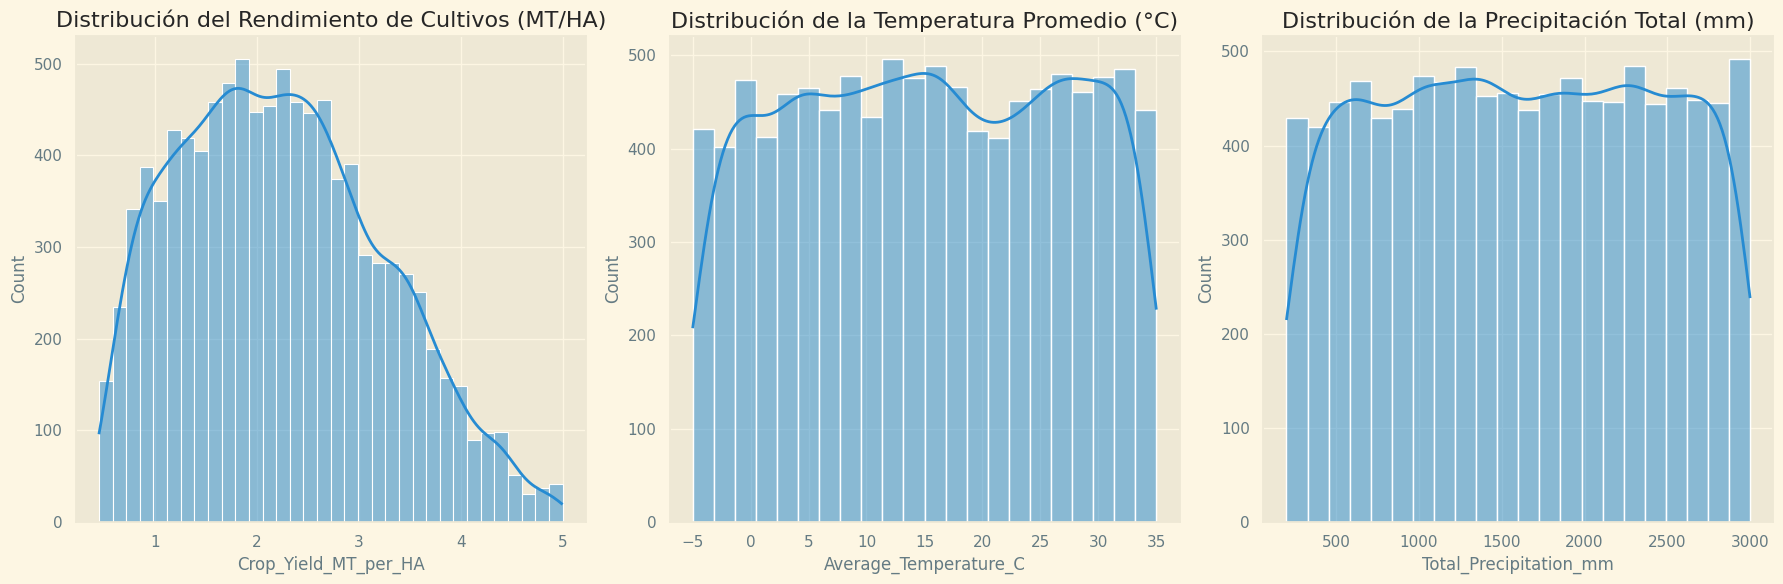

In [6]:
# Configuraci√≥n de un estilo para los gr√°ficos con seaborn.
sns.set(style="whitegrid", palette="muted")   # estilo moderno y colores suaves.
plt.style.use("Solarize_Light2")

# Visualizaci√≥n inicial de la distribuci√≥n de algunas variables clave
plt.figure(figsize=(18, 6))   # define el tama√±o del gr√°fico

plt.subplot(1, 3, 1)
sns.histplot(df['Crop_Yield_MT_per_HA'], kde=True)
plt.title('Distribuci√≥n del Rendimiento de Cultivos (MT/HA)')

plt.subplot(1, 3, 2)
sns.histplot(df['Average_Temperature_C'], kde=True)
plt.title('Distribuci√≥n de la Temperatura Promedio (¬∞C)')

plt.subplot(1, 3, 3)
sns.histplot(df['Total_Precipitation_mm'], kde=True)
plt.title('Distribuci√≥n de la Precipitaci√≥n Total (mm)')

plt.tight_layout()
plt.savefig("visualizacion_variables.png")   # guarda la figura en un archivo
plt.show()   # muestra el gr√°fico

**Histograma del rendimiento de cultivos**

El histograma muestra c√≥mo se distribuyen los valores de rendimiento en intervalos. La mayor frecuencia se encuentra entre 1.5 y 2.5 MT/HA, indicando que la mayor√≠a de los cultivos tienen rendimientos dentro de ese rango. La curva de densidad sugiere que la distribuci√≥n es asim√©trica, con una ligera cola hacia la derecha (distribuci√≥n sesgada positivamente). Adem√°s rendimientos extremos (muy bajos o my altos) son menos comunes.

En la temperaturas promedio la distribuci√≥n es relativamente uniforme entre -5¬∞C y 35¬∞C, aunque hay ligeras ca√≠das entre 15 y 20¬∞C.
Esto indica que el conjunto de datos abarca una amplia gama de climas (desde fr√≠os hasta c√°lidos), pero con una leve menor representaci√≥n de temperaturas intermedias.

La distribuci√≥n de la precipitaci√≥n tambi√©n es relativamente uniforme entre ~200 mm y 3000 mm.
Se nota una ligera concentraci√≥n mayor en los extremos (tanto secos como h√∫medos), lo que podr√≠a indicar presencia de datos de zonas √°ridas y muy lluviosas.

**Gr√°fico de dispersi√≥n: Temperatura vs Rendimiento**

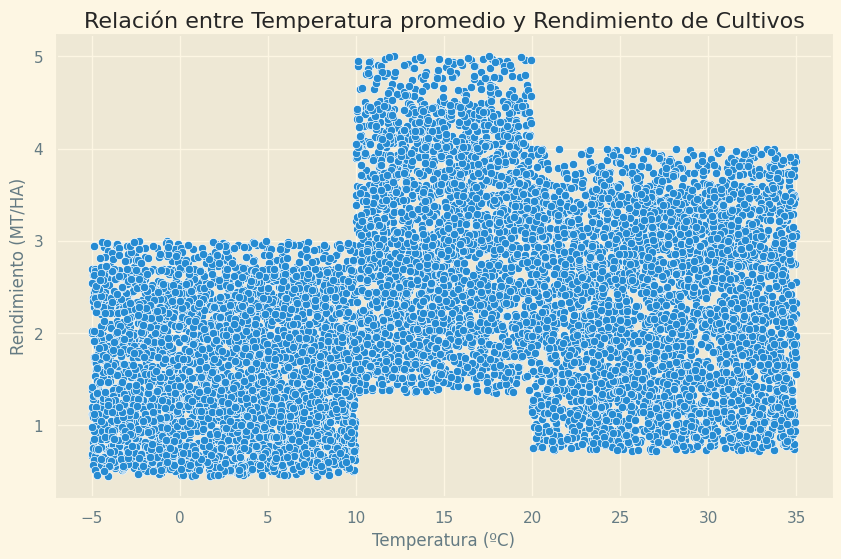

In [7]:
# Gr√°fico de dispersi√≥n
plt.figure(figsize=(10, 6))   # define el tama√±o del gr√°fico
sns.scatterplot(x="Average_Temperature_C", y="Crop_Yield_MT_per_HA", data=df)   # gr√°fico de dispersi√≥n
plt.title("Relaci√≥n entre Temperatura promedio y Rendimiento de Cultivos")   # t√≠tulo del gr√°fico
plt.xlabel("Temperatura (¬∫C)")   # etiqueta eje X
plt.ylabel("Rendimiento (MT/HA)")   # etiqueta eje Y
plt.savefig("grafico_dispersion.png")   # guarda la figura en un archivo
plt.show()   # muestra el gr√°fico

Hay una discontinuidad en los datos, lo cual indica que se trata de datos combinados de diferentes regiones o experimentos que no cubren todos los rangos de temperatura de manera continua.

Esto crea tres grupos visuales:

Uno con temperaturas de -5¬∞C a ~10¬∞C con rendimientos mayormente entre 0.5 y 3 MT/HA.

Otro entre 10¬∞C y 20¬∞C con un rango de rendimiento m√°s amplio, hasta 5 MT/HA.

Y uno final de 20¬∞C a 35¬∞C, con rendimientos nuevamente entre 0.5 y 4 MT/HA, pero con una ligera tendencia a valores m√°s bajos conforme aumenta la temperatura, es decir, que temperaturas extremadamente bajas o altas podr√≠an estar asociadas a menores rendimientos, mientras que temperaturas moderadas favorecer√≠an rendimientos m√°s altos.

No se observa una relaci√≥n lineal evidente entre temperatura y rendimiento.

**Gr√°fico de Impacto Econ√≥mico por Pa√≠s**

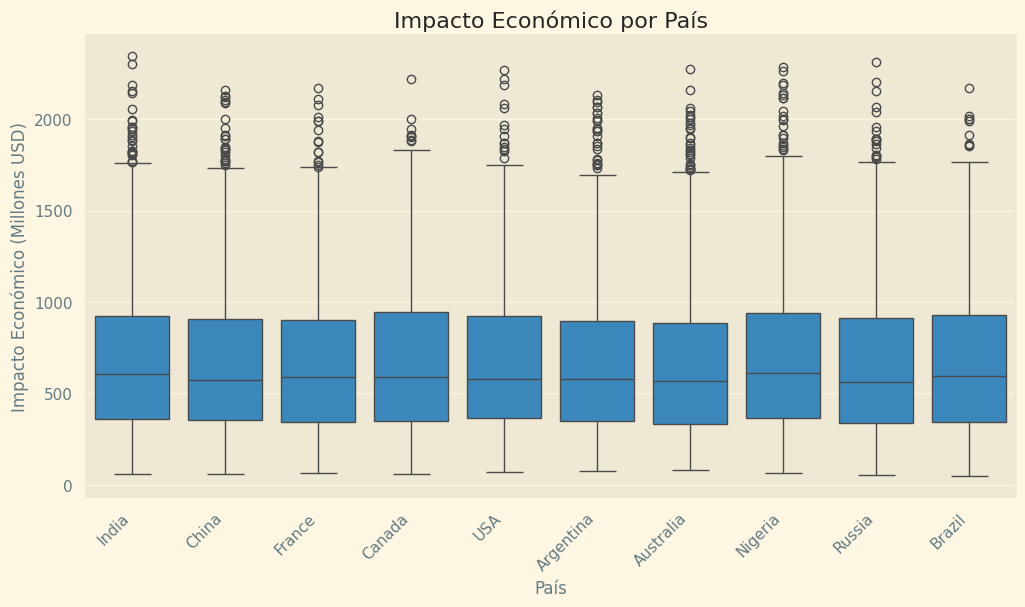

In [8]:
# Gr√°fico de caja
plt.figure(figsize=(12, 6))   #   tama√±o del gr√°fico
sns.boxplot(x='Country', y='Economic_Impact_Million_USD', data=df)
plt.title('Impacto Econ√≥mico por Pa√≠s')   # etiqueta eje X
plt.xlabel('Pa√≠s')   # etiqueta eje X
plt.ylabel('Impacto Econ√≥mico (Millones USD)')   # etiqueta eje Y
plt.xticks(rotation=45, ha='right')
plt.savefig("grafico_boxplot.png")   # guarda la figura en un archivo
plt.show()   # muestra el gr√°fico

Todos los pa√≠ses tienen una distribuci√≥n similar en forma y escala.

La mediana est√° aproximadamente entre 500 y 600 millones de USD para todos los pa√≠ses.

La altura de las cajas es bastante uniforme entre pa√≠ses, lo que indica variabilidad similar.

Los bigotes y outliers son abundantes y muy similares en todos los pa√≠ses, lo que puede indicar:
Que existen eventos extremos en todos ellos (posibles desastres, inversiones puntuales, etc.)
Que los datos tienen una distribuci√≥n con cola larga a la derecha (es decir, unos pocos valores mucho mayores que el resto).

Outliers (valores extremos):
En todos los pa√≠ses se observa una gran cantidad de valores at√≠picos (por encima de ~1750 millones USD), lo que es com√∫n en datos econ√≥micos.

El impacto econ√≥mico presenta un patr√≥n bastante consistente entre pa√≠ses, lo que sugiere que:
No hay un pa√≠s que claramente supere a los dem√°s en impacto econ√≥mico de forma sistem√°tica (al menos en la mediana).

Todos experimentan eventos econ√≥micos extremos ocasionales.

Este gr√°fico es √∫til para detectar distribuciones an√≥malas o comparar la dispersi√≥n y los valores centrales entre pa√≠ses.

**Correlaci√≥n entre variables n√∫mericas**

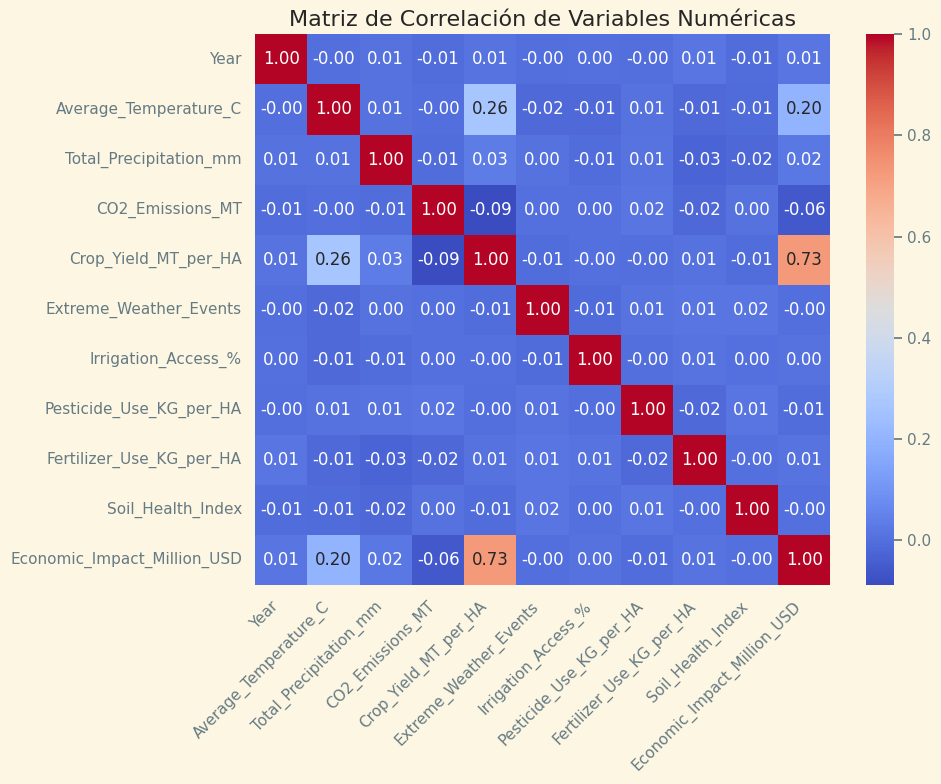

In [9]:
# Gr√°fico de correlaci√≥n
plt.figure(figsize=(10, 8))   # tama√±os del gr√°fico
# Seleccionar solo las columnas num√©ricas relevantes para la correlaci√≥n
columnas_numericas = df.select_dtypes(include=np.number).columns
sns.heatmap(df[columnas_numericas].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlaci√≥n de Variables Num√©ricas')   # t√≠tulo del gr√°fico
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("grafico_correlacion.png")   # guardar la figura en un archivo
plt.show()   # muestra el gr√°fico

Existe una fuerte correlaci√≥n entre
Crop_Yield_MT_per_HA y Economic_Impact_Million_USD: 0.73, es decir, a mayor rendimiento de cultivos, mayor impacto econ√≥mico.

Mientras que la correlaci√≥n entre Average_Temperature_C y Crop_Yield_MT_per_HA: 0.26, nos dice que a temperaturas m√°s altas tiende a aumentar el rendimiento, aunque la relaci√≥n no es muy fuerte.

Por otro lado la correlaci√≥n entre Average_Temperature_C y Economic_Impact_Million_USD: 0.20, indica que las temperaturas m√°s altas est√°n asociadas con un mayor impacto econ√≥mico, probablemente mediado por el rendimiento de los cultivos.

La mayor√≠a de las correlaciones son cercanas a cero, lo que sugiere poca o ninguna relaci√≥n lineal entre esas variables.

Por ejemplo:

Extreme_Weather_Events y cualquier otra variable ‚âà 0

Soil_Health_Index con casi todo ‚âà 0

Las relaciones negativas d√©biles:

CO2_Emissions_MT y Crop_Yield_MT_per_HA: -0.09 podr√≠a implicar que m√°s emisiones se asocian ligeramente con menor rendimiento, pero el efecto es despreciable.

El uso de fertilizantes no parece afectar directamente la salud del suelo en este conjunto de datos, Fertilizer_Use_KG_per_HA y Soil_Health_Index: -0.01

‚ö†**Recordemos que estos datos son ficticios y su uso es unicamente acad√©mico.**‚ö†

## **Inferencia estad√≠stica**

La inferencia estad√≠stica es un conjunto de m√©todos que permiten extraer conclusiones sobre una poblaci√≥n a partir del an√°lisis de una muestra de datos.
Se basa en la teor√≠a de la probabilidad para realizar generalizaciones y predicciones.

Se utilizan t√©cnicas como:

Estimaci√≥n de par√°metros:
Se calcula un valor que representa una caracter√≠stica de la poblaci√≥n (como la media o la proporci√≥n) a partir de la muestra.

Prueba de hip√≥tesis:
Se eval√∫a si una afirmaci√≥n sobre la poblaci√≥n es compatible con los datos de la muestra.

Intervalos de confianza:
Se determina un rango de valores dentro del cual es probable que se encuentre el par√°metro poblacional.

Se puede decir, que es fundamental en la investigaci√≥n cient√≠fica, el an√°lisis de datos y la toma de decisiones, ya que permite extraer conclusiones significativas a partir de datos limitados.

In [14]:
# Inferencia estad√≠stica: Estimaci√≥n
# Estimaci√≥n de la media del rendimietno e intervalo de confianza al 95%

media_rendimiento = df["Crop_Yield_MT_per_HA"].mean()   # calcula la media del rendimiento
desviacion_rendimiento = df["Crop_Yield_MT_per_HA"].std()   # calcula la deviaci√≥n est√°ndar
n = len(df)   # tama√±o de la muestra
error_estandar = desviacion_rendimiento / np.sqrt(n)   # error est√°ndar de la media
intervalo_confianza = stats.t.interval(0.95, df=n-1, loc=media_rendimiento, scale=error_estandar)   # intervalo con t-student (para muestras)

print(f"Media del rendimiento: {media_rendimiento:.2f} MT/HA")
print(f"Intervalo de confianza al 95%: {intervalo_confianza}")

Media del rendimiento: 2.24 MT/HA
Intervalo de confianza al 95%: (np.float64(2.2204473969682446), np.float64(2.2595864030317556))


Cuando se calcula un intervalo de confianza (IC), nos interesa principalmente qu√© tan ancho es, porque eso refleja la precisi√≥n de la estimaci√≥n:

Media muestral: 2.24 MT/HA

IC 95%: (2.220, 2.260)

Ancho del intervalo = 2.2596 ‚Äì 2.2204 ‚âà 0.0392 MT/HA

Si se compara con la media:

(0.0392 /  2.24)
√ó
100
‚âà
1.75%

Eso significa que la incertidumbre en torno a la media es de apenas ¬±1.75%, lo cual es bastante estrecho.

Este intervalo tan peque√±o indica que los datos son consistentes y que la media de 2.24 MT/HA es una estimaci√≥n muy precisa.

Seguramente se debe a que se tiene un n√∫mero grande de observaciones o una variabilidad baja en los rendimientos.

En t√©rminos agr√≠colas, se podr√≠a afirmar con confianza que el rendimiento real promedio est√° pr√°cticamente en ese rango (2.22‚Äì2.26 MT/HA), sin riesgo de que sea mucho mayor o menor.

Dicho de otra manera, el intervalo estrecho y preciso, es muy bueno estad√≠sticamente. Cuanto m√°s angosto es el IC, mayor seguridad se tiene de que el promedio calculado refleja la realidad.

**Estimaci√≥n del rendimiento promedio del cultivo arroz en el pa√≠s de la India**

## **Contraste de Hip√≥tesis**

Un contraste de hip√≥tesis es un procedimiento estad√≠stico para decidir si una afirmaci√≥n sobre una poblaci√≥n (la hip√≥tesis nula) es compatible con los datos de una muestra.

Se formula una hip√≥tesis nula (H0) y una hip√≥tesis alternativa (H1). Luego, se utiliza la informaci√≥n de la muestra para determinar si hay suficiente evidencia para rechazar H0 y, por lo tanto, aceptar H1. El proceso puede llevar a cometer errores de Tipo I (rechazar una hip√≥tesis nula verdadera) o errores de Tipo II (aceptar una hip√≥tesis nula falsa).

De manera educativa haremos la siguiente hip√≥tesis: El rendimiento promedio despu√©s de 2010 es menor que a√±os anteriores

HO: No hay diferencia en el rendimiento promedio despu√©s del 2010 respecto a antes del 2010.

H1: El rendimiento promedio despu√©s de 2010 es menor que el de antes de 2010.

In [27]:
# Contraste de hip√≥tesis
df_pre_2010 = df[df["Year"] <= 2010]["Crop_Yield_MT_per_HA"]   # filtra datos antes o en 2010
df_post_2010 = df[df["Year"] > 2010]["Crop_Yield_MT_per_HA"]   # filtra datos despu√©s de 2010

t_stat, p_value = stats.ttest_ind(df_pre_2010, df_post_2010, equal_var=False, alternative="less")  # t-test independiente de una cola

print(f"Estad√≠stico t: {t_stat:.2f}")
print(f"Valor p: {p_value:.4f}")
if p_value < 0.05:
  print ("Se rechaza la hipotesis nula, el rendimiento promedio despu√©s de 2010 es menor que el de antes de 2010.")
else:
  print ("No se rechaza la hipotesis nula, no hay suficiente evidencia que demuestre que el rendimiento haya disminuido despu√©s del 2010.")

Estad√≠stico t: -1.27
Valor p: 0.1026
No se rechaza la hipotesis nula, no hay suficiente evidencia que demuestre que el rendimiento haya disminuido despu√©s del 2010.


Ya que el resultado de p_value = 0.1026, no existe evidencia suficiente que demuestre una baja en el rendimiento de los cultivos. Por ende non se rechaza la hip√≥tesis nula.

Como parte educativa realizaremos otro contraste de hip√≥tesis, esta vez pondremos bajo observaci√≥n el rendimiento promedio de los cultivos entre las estrategias de adptaci√≥n, como el manejo de agua y sin adaptaci√≥n.

HO: No hay diferencia significativa en el rendimiento entre manejo del agua y sin adaptaci√≥n del cultivo.

H1: Hay una diferencia significativa en el rendimiento entre m,anejo del agua y sin adaptaci√≥n del cultivo.

In [29]:
# Contraste de hip√≥tesis
rendimiento_agua = df[df["Adaptation_Strategies"] == "Water Management"]["Crop_Yield_MT_per_HA"]   # filtra datos con manejo del agua
rendimiento_sin_agua = df[df["Adaptation_Strategies"] == "No Adaptation"]["Crop_Yield_MT_per_HA"]   # filtra datos sin manejo del agua

print(f"Media de rendimiento (Water Management): {np.mean(rendimiento_agua):.2f}")
print(f"Media de rendimiento (No Adaptation): {np.mean(rendimiento_sin_agua):.2f}")
print(f"Tama√±o de muestra (Water Management): {len(rendimiento_agua)}")
print(f"Tama√±o de muestra (No Adaptation): {len(rendimiento_sin_agua)}")

# Nivel de significancia
alpha = 0.05

#Realizar test t de student para dos muestras independientes
t_stat, p_value = stats.ttest_ind(rendimiento_agua, rendimiento_sin_agua, equal_var=False)

print(f"Estad√≠stico t: {t_stat:.2f}")
print(f"Valor p: {p_value:.4f}")
print(f"Nivel de significancia: {alpha}")
if p_value < alpha:
  print(f"Dado que el Valor P ({p_value:.3f}) < Œ± ({alpha}), RECHAZAMOS la hip√≥tesis nula.")
  print("Conclusi√≥n: Existe una diferencia estad√≠sticamente significativa en el rendimiento promedio de los cultivos")
  print("entre las estrategias de 'Water Management' y 'No Adaptation'.")
else:
  print(f"Dado que el Valor P ({p_value:.3f}) ‚â• Œ± ({alpha}), NO RECHAZAMOS la hip√≥tesis nula.")
  print("Conclusi√≥n: No existe evidencia estad√≠stica suficiente para afirmar una diferencia significativa en el rendimiento promedio de los cultivos")
  print("entre las estrategias de 'Water Management' y 'No Adaptation'.")

Media de rendimiento (Water Management): 2.21
Media de rendimiento (No Adaptation): 2.24
Tama√±o de muestra (Water Management): 2049
Tama√±o de muestra (No Adaptation): 2024
Estad√≠stico t: -0.91
Valor p: 0.3635
Nivel de significancia: 0.05
Dado que el Valor P (0.363) ‚â• Œ± (0.05), NO RECHAZAMOS la hip√≥tesis nula.
Conclusi√≥n: No existe evidencia estad√≠stica suficiente para afirmar una diferencia significativa en el rendimiento promedio de los cultivos
entre las estrategias de 'Water Management' y 'No Adaptation'.


**Conclusi√≥n**

En este proyecto, se ha explorado el dataset simulado sobre el impacto del cambio clim√°tico en la agricultura, teniendo un enfoque en inferencia estad√≠stica y contrastes de hip√≥tesis para extraer insights educativos. Aunque los datos no son reales y no deben usarse para decisiones pol√≠ticas o pron√≥sticos, permite demostrar conceptos clave de an√°lisis de datos. A continuaci√≥n, se resume los hallazgos principales:

Exploraci√≥n de Datos (EDA):

El dataset contiene 10,000 observaciones con 15 variables, sin valores nulos, lo que facilita el an√°lisis.
El rendimiento promedio de los cultivos es de 2.24 MT/HA, con una distribuci√≥n aproximadamente normal (confirmada por el histograma). Esto indica una variabilidad moderada en los rendimientos, posiblemente influida por factores clim√°ticos.
Visualizaciones como el scatter plot de temperatura vs. rendimiento indican posibles correlaciones negativas (a mayor temperatura, menor rendimiento).

Inferencia Estad√≠stica - Estimaci√≥n:

La media muestral del rendimiento es de 2.24 MT/HA, con un intervalo de confianza al 95% de (2.22, 2.26) MT/HA. Este intervalo es muy estrecho (ancho aproximado de 0.039 MT/HA, o ~1.75% de la media), lo que indica una estimaci√≥n precisa y consistente. Con un tama√±o de muestra grande (10,000 observaciones), se tiene alta confianza en que el rendimiento poblacional real se encuentra en este rango. Esto refleja baja variabilidad en los datos simulados y refuerza la utilidad del dataset para fines educativos.

Contraste de Hip√≥tesis:

Hip√≥tesis 1: Rendimiento pre- vs. post-2010: No se rechaz√≥ la hip√≥tesis nula (p-value = 0.1026 > 0.05). No hay evidencia estad√≠stica suficiente para afirmar que el rendimiento de los cultivos ha disminuido significativamente despu√©s de 2010 debido al cambio clim√°tico simulado. Esto podr√≠a indicar que, en este dataset ficticio, factores como el aumento de temperatura o emisiones de CO2 no han impactado dr√°sticamente el rendimiento en las √∫ltimas d√©cadas.

Hip√≥tesis 2: Estrategias de adaptaci√≥n (Water Management vs. No Adaptation): No se rechaz√≥ la hip√≥tesis nula (p-value = 0.3635 > 0.05). Las medias de rendimiento son similares (2.21 MT/HA para Water Management y 2.24 MT/HA para No Adaptation), y no hay diferencia estad√≠sticamente significativa. Esto sugiere que, en los datos simulados, las estrategias de adaptaci√≥n no marcan una diferencia clara en el rendimiento, posiblemente porque otros factores (como precipitaci√≥n o salud del suelo) dominan.

Limitaciones y Consideraciones Educativas:

Dado que el dataset es simulado, los resultados no reflejan la realidad agr√≠cola global, donde el cambio clim√°tico s√≠ ha demostrado impactos negativos (ejemplo, sequ√≠as y eventos extremos). Este an√°lisis sirve para practicar t√©cnicas estad√≠sticas, pero en datos reales, podr√≠amos observar p-values m√°s bajos y efectos significativos.